In [40]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import seaborn as sns

# Suppress FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

start_date = '2021-01-01'
end_date = '2023-12-31'
state_code = 'NY'  # New York

# Load data
merged_data = pd.read_csv(f'../data/{state_code}_renewable_energy_weather_data.csv')
merged_data['date'] = pd.to_datetime(merged_data['date'])

In [41]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           36 non-null     datetime64[ns]
 1   SUN            36 non-null     float64       
 2   WND            36 non-null     float64       
 3   month          36 non-null     object        
 4   temp           36 non-null     float64       
 5   wind_speed     36 non-null     float64       
 6   precipitation  36 non-null     float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 2.1+ KB


In [42]:
merged_data.shape

(36, 7)

In [43]:
merged_data.head()

,date,SUN,WND,month,temp,wind_speed,precipitation
0,2021-01-01,313.85997,1309.79095,2021-01,-4.096667,11.373333,1.863333
1,2021-02-01,233.49777,1589.46623,2021-02,-3.935714,11.075000,2.092857
2,2021-03-01,552.00175,2874.20640,2021-03,2.848387,14.545161,1.777419
3,2021-04-01,572.01193,1642.59194,2021-04,8.920000,11.996667,3.980000
4,2021-05-01,637.82369,1384.59791,2021-05,14.406452,12.393548,2.348387


In [44]:
merged_data.describe()

,SUN,WND,temp,wind_speed,precipitation
count,36.000000,36.000000,36.000000,36.000000,36.000000
mean,748.335414,1885.133782,9.925328,10.924509,3.555832
std,308.413275,535.226435,9.456182,1.660805,1.697627
min,233.497770,1021.380940,-7.158065,8.264516,1.425806
25%,549.280128,1467.667078,1.872581,9.900833,2.325806
50%,662.669615,1760.639450,10.360430,10.677419,3.250000
75%,959.996890,2343.735685,18.248333,12.076532,4.011667
max,1398.335750,2874.206400,23.445161,14.545161,8.454839


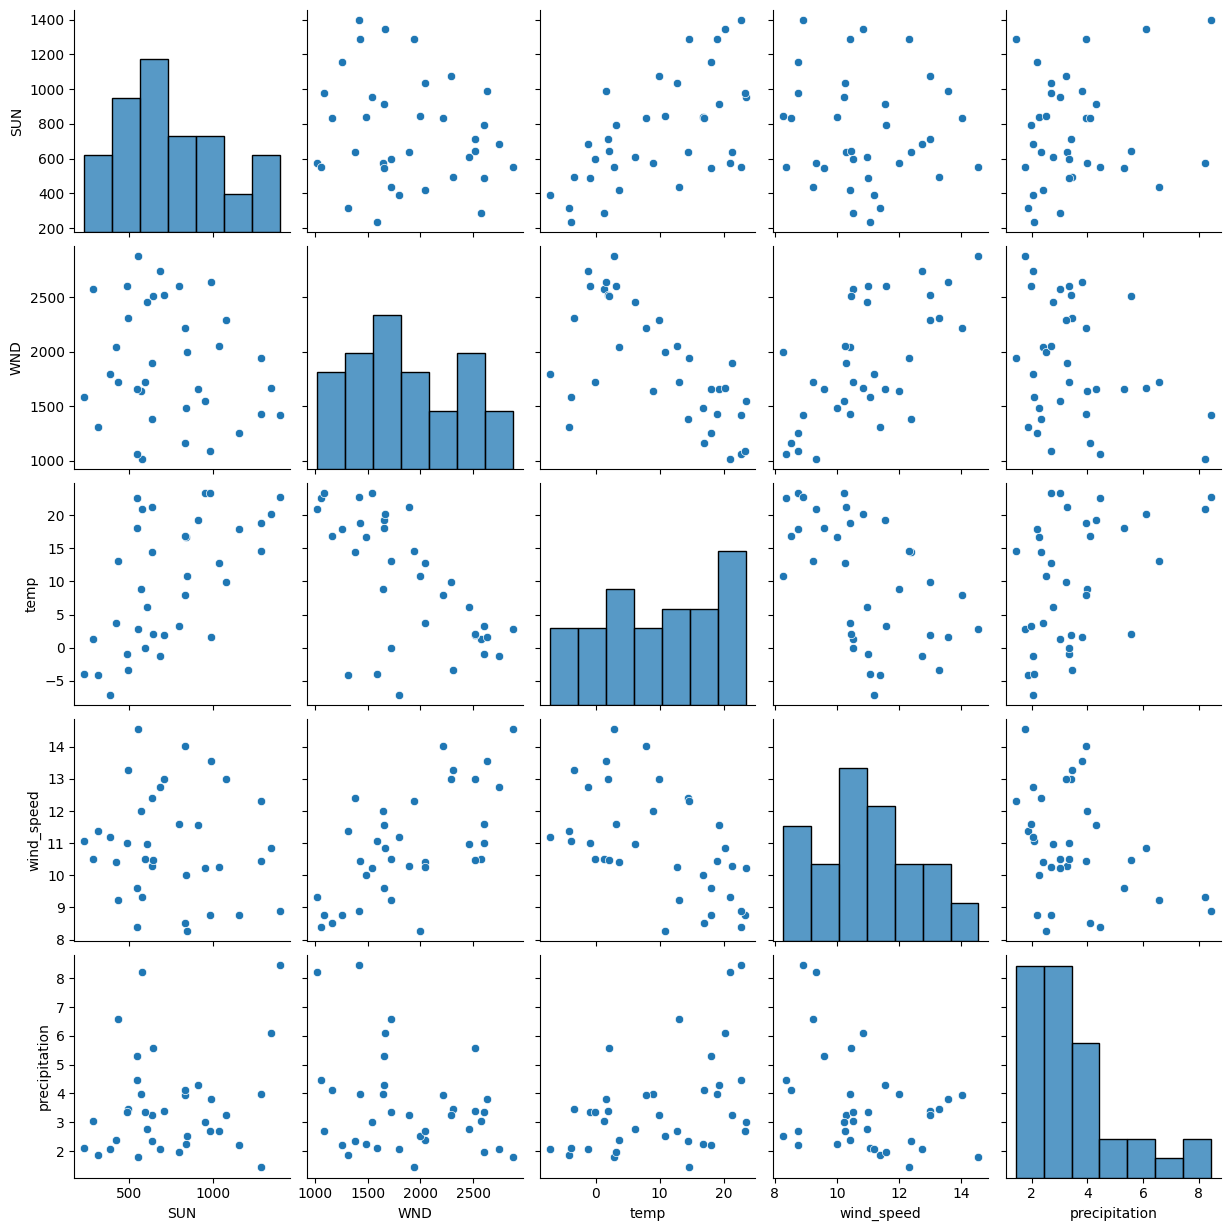

In [45]:
sns.pairplot(merged_data)

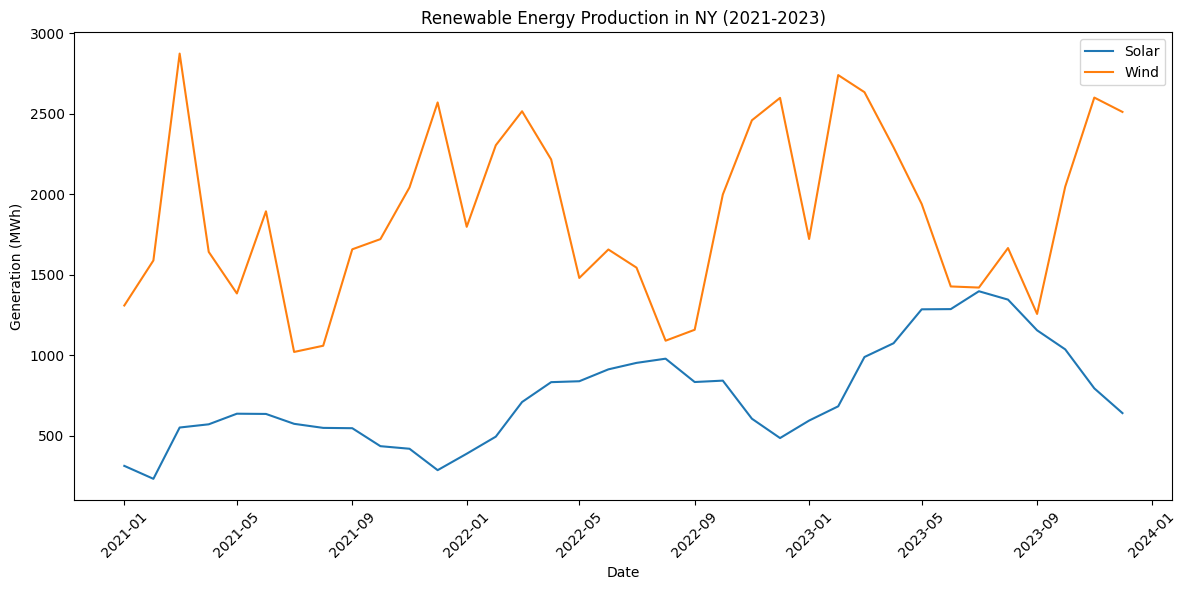

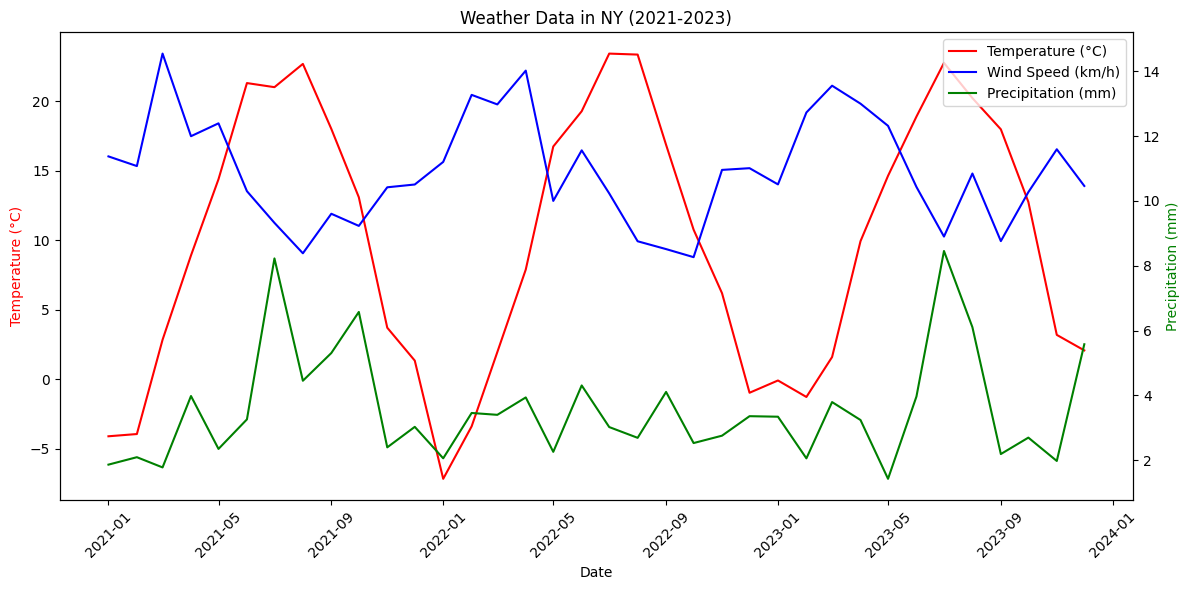

In [46]:
start_year = datetime.strptime(start_date, '%Y-%m-%d').year
end_year = datetime.strptime(end_date, '%Y-%m-%d').year

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(merged_data['date'], merged_data['SUN'], label='Solar')
plt.plot(merged_data['date'], merged_data['WND'], label='Wind')
plt.title(f'Renewable Energy Production in {state_code} ({start_year}-{end_year})')
plt.xlabel('Date')
plt.ylabel('Generation (MWh)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'../docs/figures/{state_code}_renewable_energy_production.png')
plt.show()

# Weather data plot
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
ax1.plot(merged_data['date'], merged_data['temp'], 'r-', label='Temperature (°C)')
ax2.plot(merged_data['date'], merged_data['wind_speed'], 'b-', label='Wind Speed (km/h)')
ax2.plot(merged_data['date'], merged_data['precipitation'], 'g-', label='Precipitation (mm)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)', color='r')
ax2.set_ylabel('Wind Speed (km/h)', color='b')
ax2.set_ylabel('Precipitation (mm)', color='g')
plt.title(f'Weather Data in {state_code} ({start_year}-{end_year})')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
ax1.tick_params(axis='x', rotation=45)  # This line replaces plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'../docs/figures/{state_code}_weather_data.png')
plt.show()

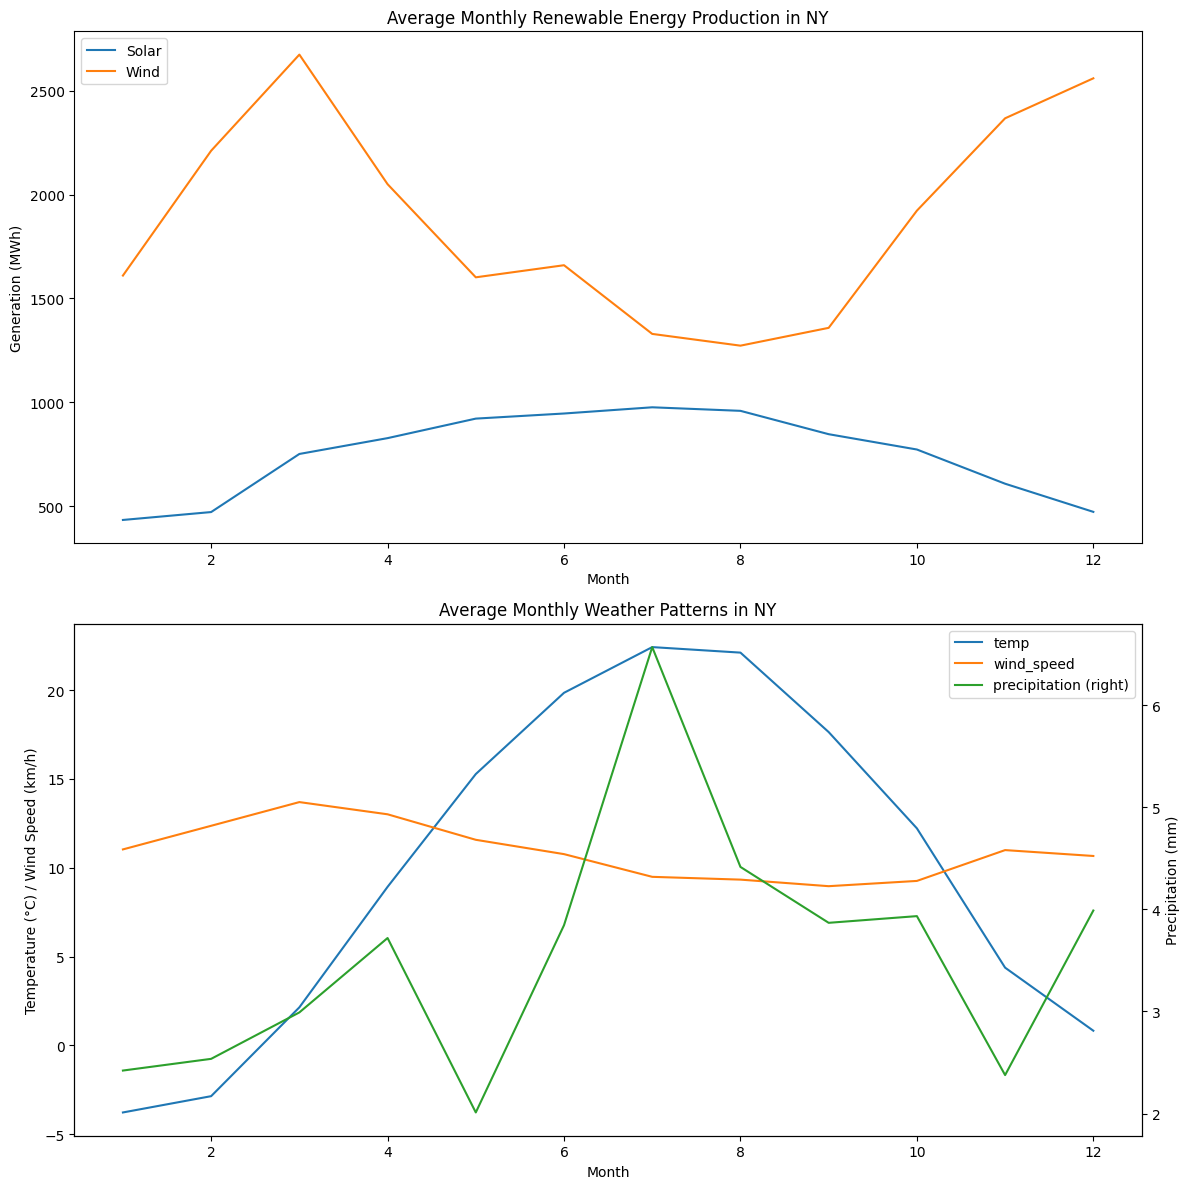


Regression Analysis for Solar Production:
R-squared: 0.4276
Coefficients:
temp: 25.4668
wind_speed: 59.4240
precipitation: -6.8985

Regression Analysis for Wind Production:
R-squared: 0.5298
Coefficients:
temp: -23.1123
wind_speed: 140.9900
precipitation: 10.4114

Impact of Extreme Temp on SUN Production:
Average production on extreme days: 970.28 MWh
Average production on normal days: 720.59 MWh
T-statistic: 1.5574
P-value: 0.1286

Impact of Extreme Wind_speed on WND Production:
Average production on extreme days: 2507.63 MWh
Average production on normal days: 1807.32 MWh
T-statistic: 2.6755
P-value: 0.0114

Impact of Extreme Precipitation on SUN Production:
Average production on extreme days: 938.98 MWh
Average production on normal days: 724.50 MWh
T-statistic: 1.3254
P-value: 0.1939


In [47]:
from scipy import stats
from sklearn.linear_model import LinearRegression

# 1. Correlation Analysis
correlation_matrix = merged_data[['SUN', 'WND', 'temp', 'wind_speed', 'precipitation']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title(f'Correlation Heatmap for {state_code}')
plt.tight_layout()
plt.savefig(f'../docs/figures/{state_code}_correlation_heatmap.png')
plt.close()

# 2. Seasonal Patterns
merged_data['month'] = merged_data['date'].dt.month
seasonal_data = merged_data.groupby('month')[['SUN', 'WND', 'temp', 'wind_speed', 'precipitation']].mean()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
seasonal_data[['SUN', 'WND']].plot(ax=ax1)
ax1.set_title(f'Average Monthly Renewable Energy Production in {state_code}')
ax1.set_xlabel('Month')
ax1.set_ylabel('Generation (MWh)')
ax1.legend(['Solar', 'Wind'])

seasonal_data[['temp', 'wind_speed', 'precipitation']].plot(ax=ax2, secondary_y=['precipitation'])
ax2.set_title(f'Average Monthly Weather Patterns in {state_code}')
ax2.set_xlabel('Month')
ax2.set_ylabel('Temperature (°C) / Wind Speed (km/h)')
ax2.right_ax.set_ylabel('Precipitation (mm)')
plt.tight_layout()
plt.savefig(f'../docs/figures/{state_code}_seasonal_patterns.png')
plt.show()

# 3. Regression Analysis
def perform_regression(X, y, label):
    model = LinearRegression()
    model.fit(X, y)
    r_squared = model.score(X, y)
    print(f"\nRegression Analysis for {label}:")
    print(f"R-squared: {r_squared:.4f}")
    print("Coefficients:")
    for name, coef in zip(X.columns, model.coef_):
        print(f"{name}: {coef:.4f}")

perform_regression(merged_data[['temp', 'wind_speed', 'precipitation']], merged_data['SUN'], 'Solar Production')
perform_regression(merged_data[['temp', 'wind_speed', 'precipitation']], merged_data['WND'], 'Wind Production')

# 4. Extreme Weather Impact
def analyze_extreme_weather(data, weather_var, threshold_percentile, energy_type):
    threshold = data[weather_var].quantile(threshold_percentile)
    extreme_days = data[data[weather_var] > threshold]
    normal_days = data[data[weather_var] <= threshold]
    
    t_stat, p_value = stats.ttest_ind(extreme_days[energy_type], normal_days[energy_type])
    
    print(f"\nImpact of Extreme {weather_var.capitalize()} on {energy_type} Production:")
    print(f"Average production on extreme days: {extreme_days[energy_type].mean():.2f} MWh")
    print(f"Average production on normal days: {normal_days[energy_type].mean():.2f} MWh")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4f}")

analyze_extreme_weather(merged_data, 'temp', 0.9, 'SUN')
analyze_extreme_weather(merged_data, 'wind_speed', 0.9, 'WND')
analyze_extreme_weather(merged_data, 'precipitation', 0.9, 'SUN')

In [54]:
import pandas as pd

# Ensure the date is set as the index and is in datetime format
merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data.set_index('date', inplace=True)

# Calculate average monthly renewable energy production
monthly_energy = merged_data.groupby(merged_data.index.month)[['SUN', 'WND']].mean()

# Reset the index to make 'Month' a column
monthly_energy.reset_index(inplace=True)

# Rename columns for clarity
monthly_energy.columns = ['Month', 'Solar', 'Wind']

# Add month names for better readability in Canva
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_energy['Month'] = monthly_energy['Month'].map(dict(enumerate(month_names, 1)))

# Save to CSV
monthly_energy.to_csv('../docs/figures/ny_monthly_energy_production.csv', index=False)

print("CSV file 'ny_monthly_energy_production.csv' has been created in the '../docs/figures/' directory.")

CSV file 'ny_monthly_energy_production.csv' has been created in the '../docs/figures/' directory.


In [55]:
# Select only the renewable energy production columns
energy_production = merged_data[['SUN', 'WND']].copy()

# Reset the index to make 'date' a column
energy_production.reset_index(inplace=True)

# Rename columns for clarity
energy_production.columns = ['Date', 'Solar', 'Wind']

# Format the date as 'YYYY-MM' for better readability in Canva
energy_production['Date'] = energy_production['Date'].dt.strftime('%Y-%m')

# Save to CSV
energy_production.to_csv('../docs/figures/ny_energy_production_all_years.csv', index=False)

print("CSV file 'ny_energy_production_all_years.csv' has been created in the '../docs/figures/' directory.")

CSV file 'ny_energy_production_all_years.csv' has been created in the '../docs/figures/' directory.
